# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

# Read the Data

In [ ]:
df_tesla = pd.read_csv('/content/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
df_tesla.head()
# df_tesla.shape
# df_tesla.columns

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [ ]:
print(f'Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')

Largest value for "Unemployemnt Benefits" in Web Search: 14


### Bitcoin

In [ ]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(df_btc_search[df_btc_search.BTC_NEWS_SEARCH == df_btc_search.BTC_NEWS_SEARCH.max()])

largest BTC News Search: 100
      MONTH  BTC_NEWS_SEARCH
39  2017-12              100


# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_btc_price.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: True
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [ ]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [ ]:
type(df_tesla.MONTH.loc[0]) #str
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla.head()
type(df_tesla.MONTH.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
type(df_btc_search.MONTH.loc[0]) #str
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_search.head()
type(df_btc_search.MONTH.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
type(df_btc_price.DATE.loc[0]) #str
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_price.head()
type(df_btc_price.DATE.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
type(df_unemployment.MONTH.loc[0]) #str
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.head()
type(df_unemployment.MONTH.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data

In [1]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()
df_btc_monthly.head()
# df_btc_monthly.shape # (73, 2)
# type(df_btc_monthly.index)

NameError: name 'df_btc_price' is not defined

In [ ]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').mean()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis
years = dt.YearLocator()
months = dt.MonthLocator()
years_frt = dt.DateFormatter('%Y')

### Tesla Stock Price v.s. Search Volume

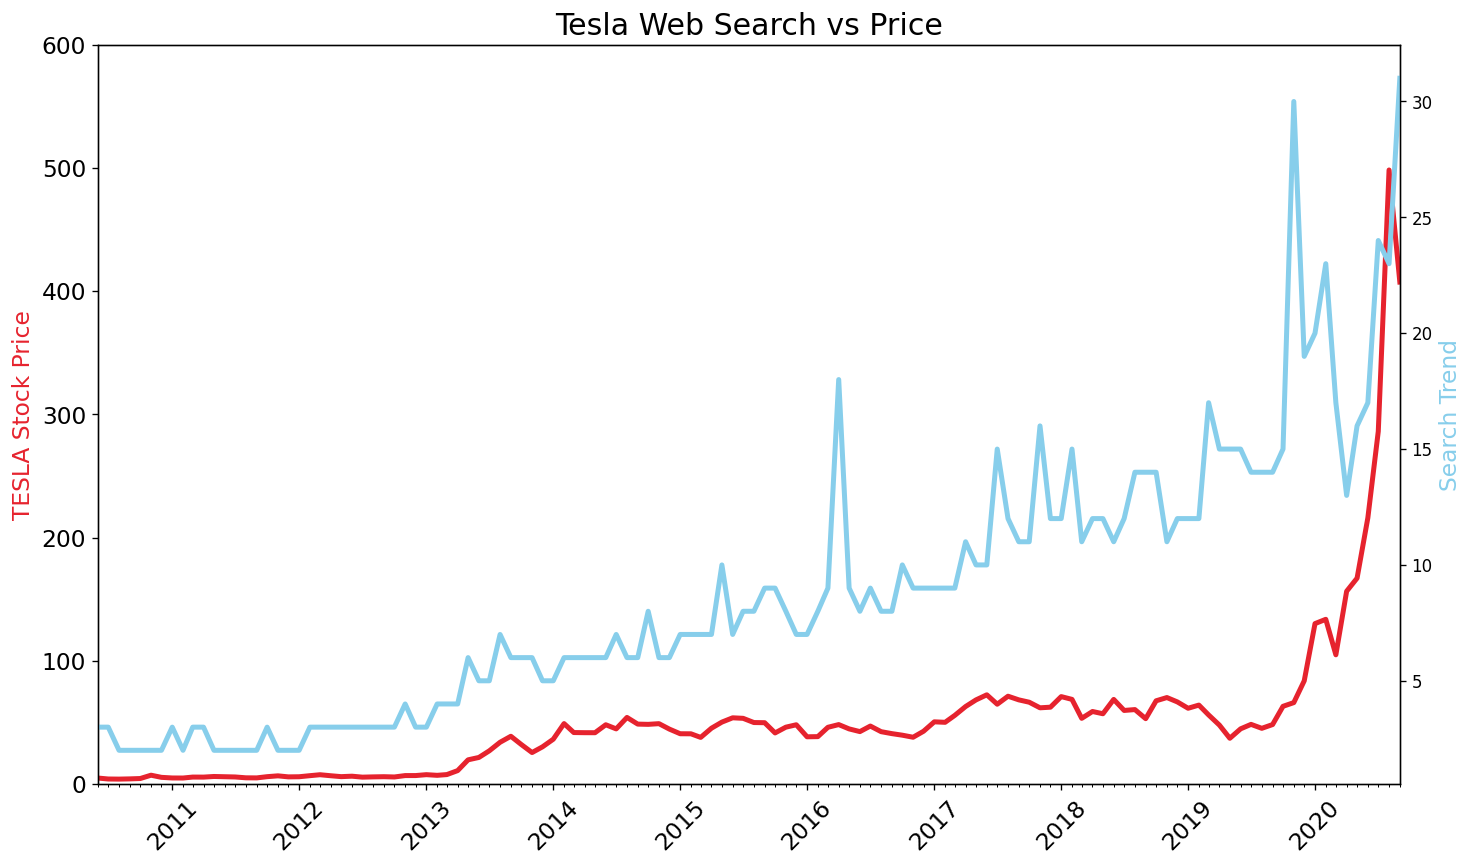

In [ ]:
plt.figure(figsize=(14, 8), dpi=120) # Size & Resolution

plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())
ax1.set_ylim(0, 600)
ax1.set_ylabel('TESLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_frt)
ax1.xaxis.set_minor_locator(months)



ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

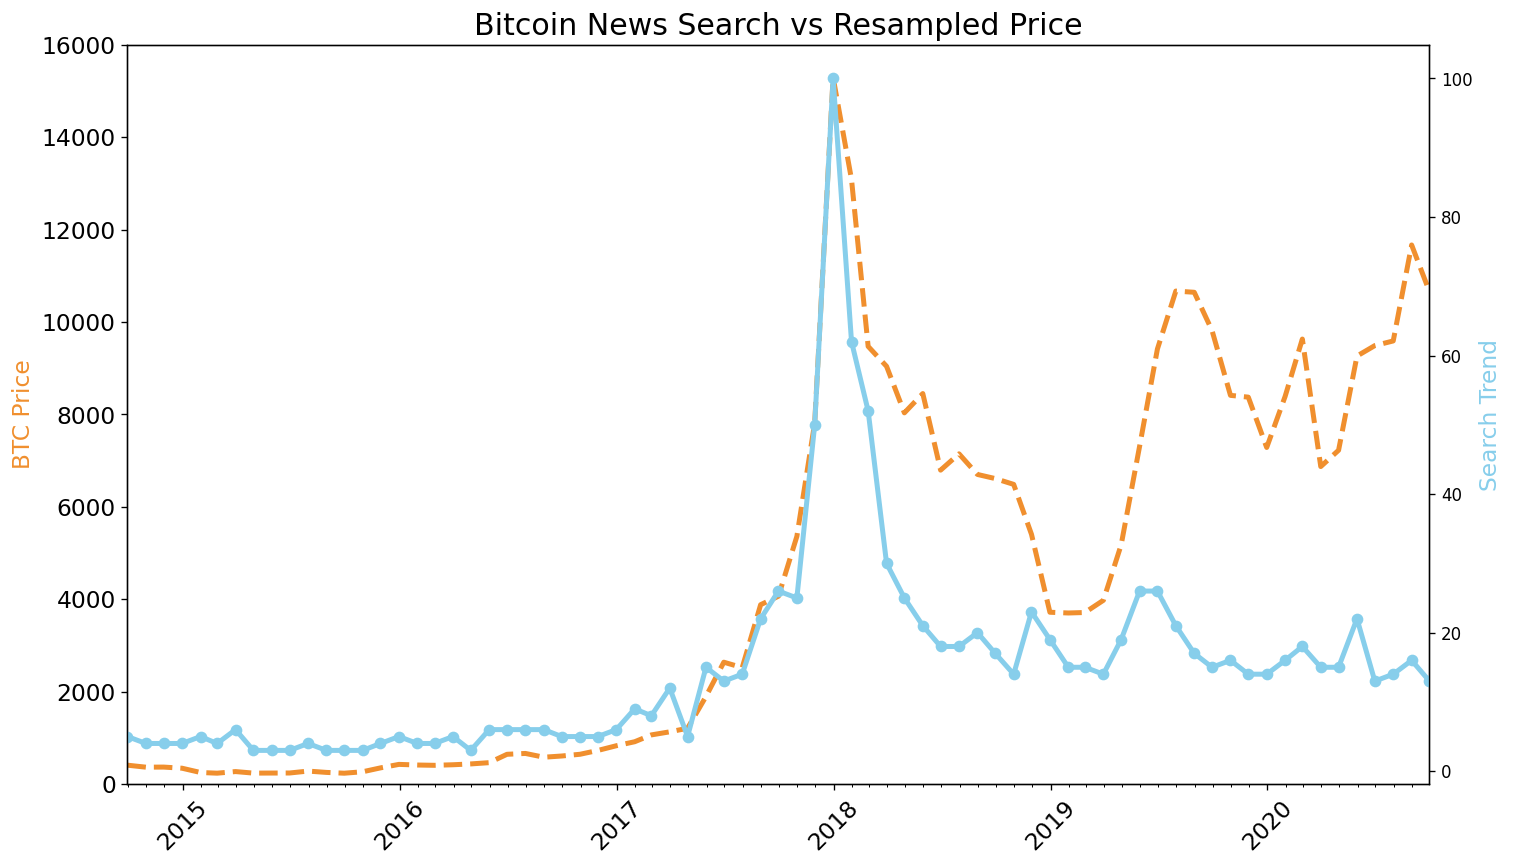

In [ ]:
plt.figure(figsize=(14, 8), dpi=120) # Size & Resolution

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(df_btc_monthly.index.min(), df_btc_monthly.index.max())
ax1.set_ylim(0, 16000)
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_frt)
ax1.xaxis.set_minor_locator(months)



ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

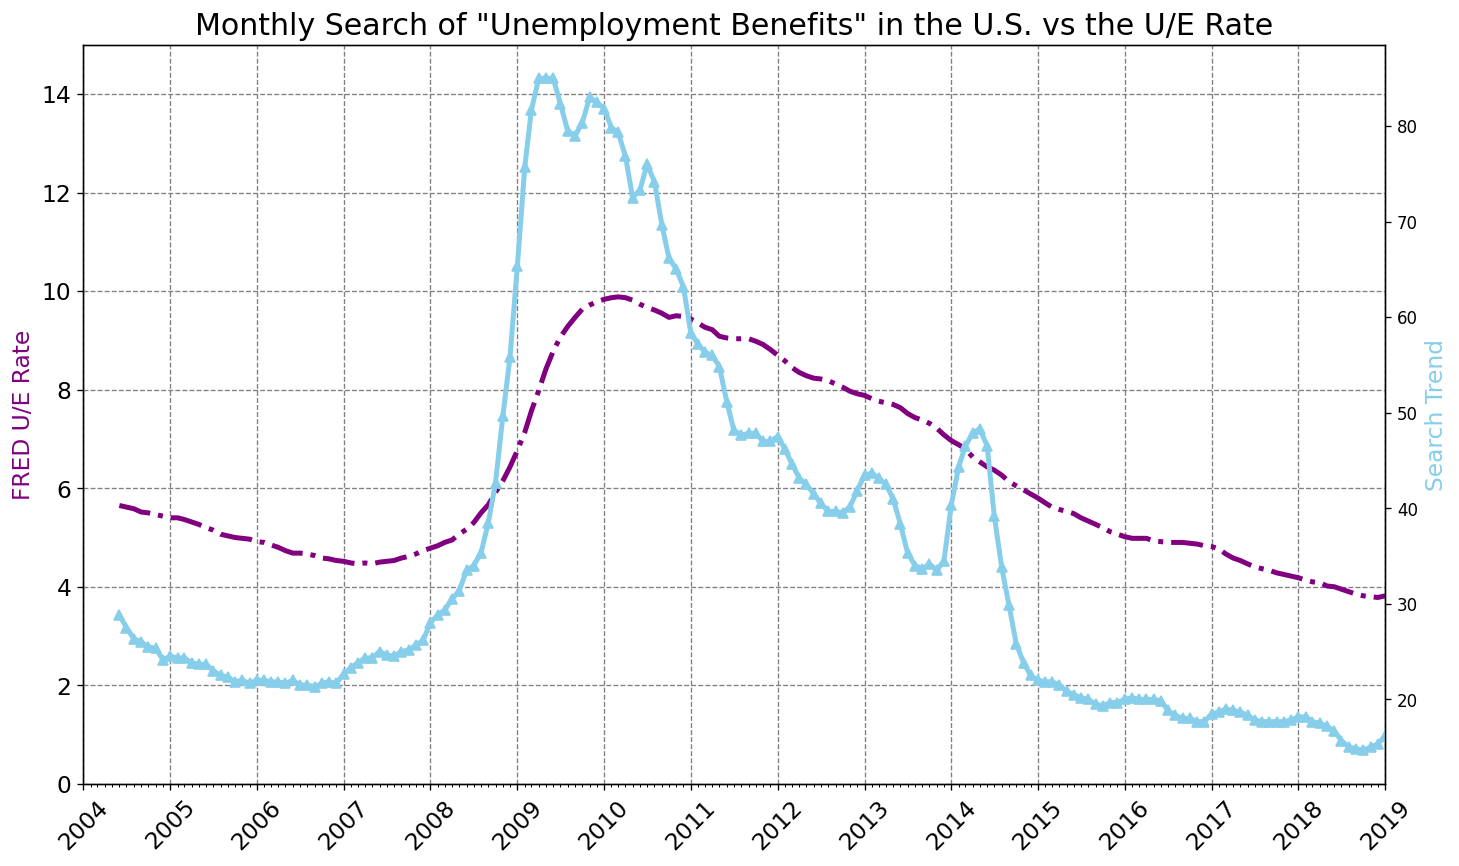

In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
roll_df

plt.figure(figsize=(14, 8), dpi=120) # Size & Resolution

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())
ax1.set_ylim(0, 15)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
ax1.grid(color='grey', linestyle='--')

# ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_frt)
ax1.xaxis.set_minor_locator(months)



ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3, marker='^')

plt.show()

### Including 2020 in Unemployment Charts

In [ ]:
df_unemployment_20 = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [ ]:
df_unemployment_20.MONTH = pd.to_datetime(df_unemployment_20.MONTH)
df_unemployment_20.head()
# type(df_unemployment_20.MONTH.loc[0])

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


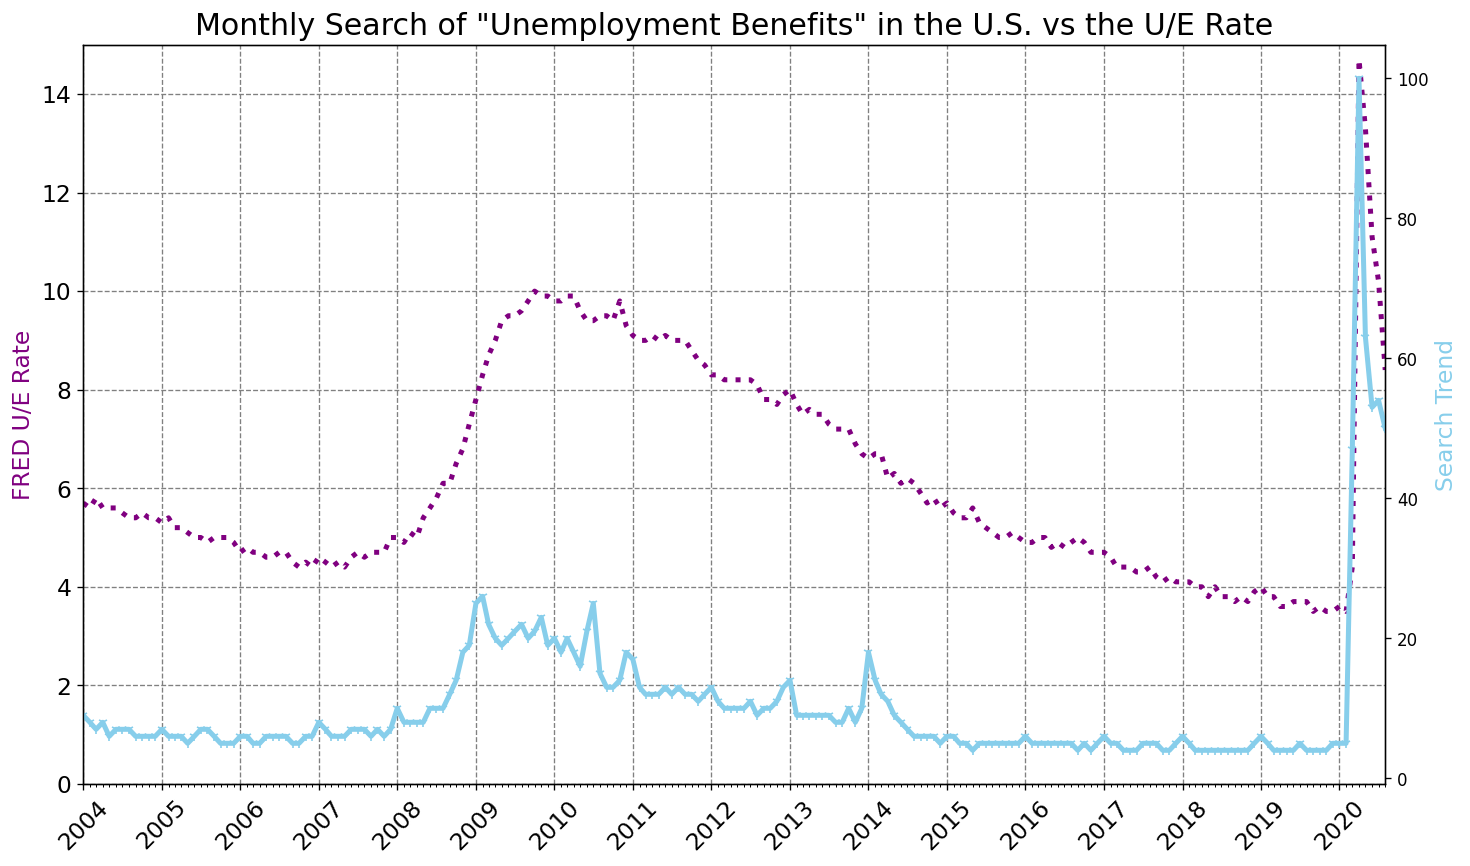

In [ ]:
# roll_df_20 = df_unemployment_20[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
# roll_df_20

plt.figure(figsize=(14, 8), dpi=120) # Size & Resolution

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(df_unemployment_20.MONTH.min(), df_unemployment_20.MONTH.max())
ax1.set_ylim(0, 15)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
ax1.grid(color='grey', linestyle='--')

# ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_frt)
ax1.xaxis.set_minor_locator(months)



ax1.plot(df_unemployment_20.MONTH, df_unemployment_20.UNRATE, color='purple', linewidth=3, linestyle=':')
ax2.plot(df_unemployment_20.MONTH, df_unemployment_20.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3,marker='1')

plt.show()